# Explore Bottle File Data from GO-SHIP

### In this notebook we will plot data from a bottle file, collected on a repeat hydrographic section part of the GO-SHIP repeat hydrographic program.

All hydrographic data part of this progam are publicly avaiable and are archived at [CCHDO](https://cchdo.ucsd.edu/). The section analyzed here (P18) is a meridonal transect in the eastern Pacific roughly along the 103$^o$W meridian. Section data is available at https://cchdo.ucsd.edu/cruise/33RO20161119. The netCDF file for the bottle data can be downloaded [here](https://cchdo.ucsd.edu/data/38327/33RO20161119_nc_hyd.zip).

In [18]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

plt.rcParams["font.size"] = 16
plt.rcParams["figure.facecolor"] = 'white'
import warnings
warnings.filterwarnings('ignore')

datapath = './data/'

In [19]:
# Load netCDF file locally as xarray Dataset

dd = xr.load_dataset('p18_btl.nc')
dd

<xarray.Dataset>
Dimensions:                             (latitude: 1, longitude: 1, pressure: 24, time: 1)
Coordinates:
  * pressure                            (pressure) float64 4.277e+03 ... 2.4
  * time                                (time) datetime64[ns] 2016-12-16T14:3...
  * latitude                            (latitude) float32 -14.0
  * longitude                           (longitude) float32 -103.0
Data variables: (12/84)
    temperature                         (pressure) float64 1.854 1.815 ... 23.89
    salinity                            (pressure) float64 34.68 34.68 ... 35.93
    salinity_QC                         (pressure) int16 2 2 2 2 2 ... 2 2 2 2 2
    bottle_salinity                     (pressure) float64 34.68 34.68 ... 35.92
    bottle_salinity_QC                  (pressure) int16 2 2 2 2 2 ... 2 2 2 2 2
    oxygen                              (pressure) float64 137.3 137.4 ... 211.5
    ...                                  ...
    D15N_ALPHA_N2O                      (pressure) float64 nan nan ... 17.77
    D15N_ALPHA_N2O_QC                   (pressure) int16 9 9 9 9 9 ... 2 2 2 2 2
    woce_date                           (time) int32 20161216
    woce_time                           (time) int16 1439
    station                             |S40 b'96                            ...
    cast                                |S40 b'1                             ...
Attributes: (12/14)
    EXPOCODE:                            33RO20161119
    Conventions:                         COARDS/WOCE
    WOCE_VERSION:                        3.0
    WOCE_ID:                             P18
    DATA_TYPE:                           WOCE Bottle
    STATION_NUMBER:                      96
    ...                                  ...
    Creation_Time:                       2023-06-06T23:37:12.187555Z
    ORIGINAL_HEADER:                     BOTTLE,20230606CCHSIOCBG\n# Merged p...
    BOTTLE_NUMBERS:                      11010 11101 11102 11103 11104 11105 ...
    BOTTLE_QUALITY_CODES:                [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...
    WOCE_BOTTLE_FLAG_DESCRIPTION:        ::1 = Bottle information unavailable...
    WOCE_WATER_SAMPLE_FLAG_DESCRIPTION:  ::1 = Sample for this measurement wa...

In [20]:
# List the variables in this bottle file
all_vars = [i for i in dd.data_vars] 
all_vars

['temperature',
 'salinity',
 'salinity_QC',
 'bottle_salinity',
 'bottle_salinity_QC',
 'oxygen',
 'oxygen_QC',
 'bottle_oxygen',
 'bottle_oxygen_QC',
 'silicate',
 'silicate_QC',
 'nitrate',
 'nitrate_QC',
 'nitrite',
 'nitrite_QC',
 'phosphate',
 'phosphate_QC',
 'freon_11',
 'freon_11_QC',
 'freon_12',
 'freon_12_QC',
 'sulfur_hexifluoride',
 'sulfur_hexifluoride_QC',
 'total_carbon',
 'total_carbon_QC',
 'alkalinity',
 'alkalinity_QC',
 'ph',
 'ph_QC',
 'ph_temperature',
 'carbon_13',
 'carbon_13_QC',
 'carbon_14',
 'carbon_14_QC',
 'delc14_error',
 'carbon_tetrachloride1',
 'carbon_tetrachloride1_QC',
 'particulate_organic_carbon',
 'particulate_organic_carbon_QC',
 'dissolved_organic_carbon',
 'dissolved_organic_carbon_QC',
 'total_dissolved_nitrogen',
 'total_dissolved_nitrogen_QC',
 'particulate_organic_nitrogen',
 'particulate_organic_nitrogen_QC',
 'nitrous_oxide',
 'nitrous_oxide_QC',
 'isotopic_composision_of_nitrate',
 'isotopic_composision_of_nitrate_QC',
 'dissolved_org

In [21]:
exclude_vars = ['woce_date','woce_time','station','cast']  # exclude these variables
# get a list of varaibles which might be useful to analyze in this bottle file
vars_of_interest = [i for i in res if '_QC' not in i and i not in exclude_vars]
vars_of_interest

['temperature',
 'salinity',
 'bottle_salinity',
 'oxygen',
 'bottle_oxygen',
 'silicate',
 'nitrate',
 'nitrite',
 'phosphate',
 'freon_11',
 'freon_12',
 'sulfur_hexifluoride',
 'total_carbon',
 'alkalinity',
 'ph',
 'ph_temperature',
 'carbon_13',
 'carbon_14',
 'delc14_error',
 'carbon_tetrachloride1',
 'particulate_organic_carbon',
 'dissolved_organic_carbon',
 'total_dissolved_nitrogen',
 'particulate_organic_nitrogen',
 'nitrous_oxide',
 'isotopic_composision_of_nitrate',
 'dissolved_organic_carbon_14',
 '14C-DOCERR',
 '13C-DOC',
 'N2_ARGON_UNSTRIPPED',
 'N2_ARGON_UNSTRIPPED_ERROR',
 'N2_ARGON',
 'N2_ARGON_ERROR',
 'D15N_N2',
 'D15N_N2_ERROR',
 'D15N_NO3_ERROR',
 'D15N_NO2+NO3',
 'D18O_NO2+NO3',
 'D18O_NO3',
 'TDP',
 'N2O_ALT_1',
 'D15N_N2O',
 'D18O_N2O',
 'D15N_ALPHA_N2O']

In [28]:
# Calculate Depth as a function of pressure, latitude
depth = gsw.z_from_p(dd.pressure,
                     dd.latitude,)

### We can plot some of these variables of interest in a subplot together

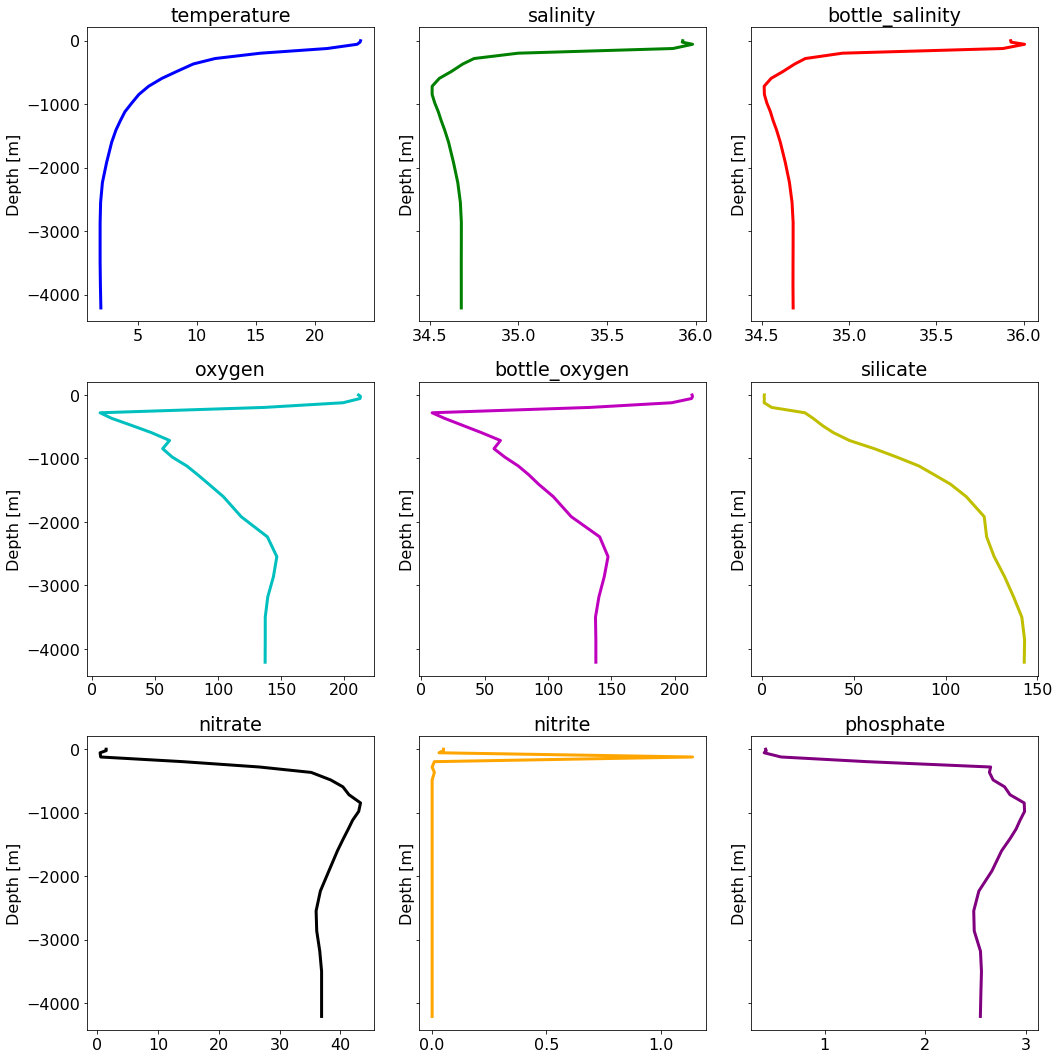

In [29]:
# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

fig, axs = plt.subplots(3, 3, figsize=(15, 15),sharey=True)
# Loop through variables and plot in each subplot
for i, var in enumerate(vars_of_interest[:9]):
    # Calculate subplot index
    row = i // 3
    col = i % 3
    
    # Plot variable on the corresponding subplot
    axs[row, col].plot(dd[var],depth, 
                       label=var,linewidth='3',color=colors[i])
    axs[row, col].set_title(var)
    axs[row, col].set_ylabel('Depth [m]')

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

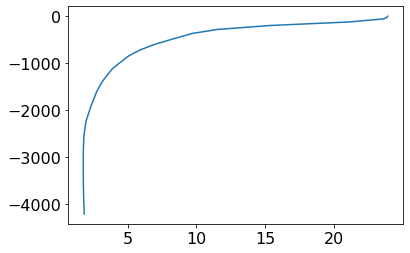

In [38]:
plt.plot(dd.temperature,dd.depth)
